# VC YIMBY stats

From ACS.

## Setup

In [4]:
import cenpy
import segregation
import contextily
import matplotlib.pyplot as plt
import microdf as mdf
import pandas as pd

In [3]:
mdf.set_plot_style()

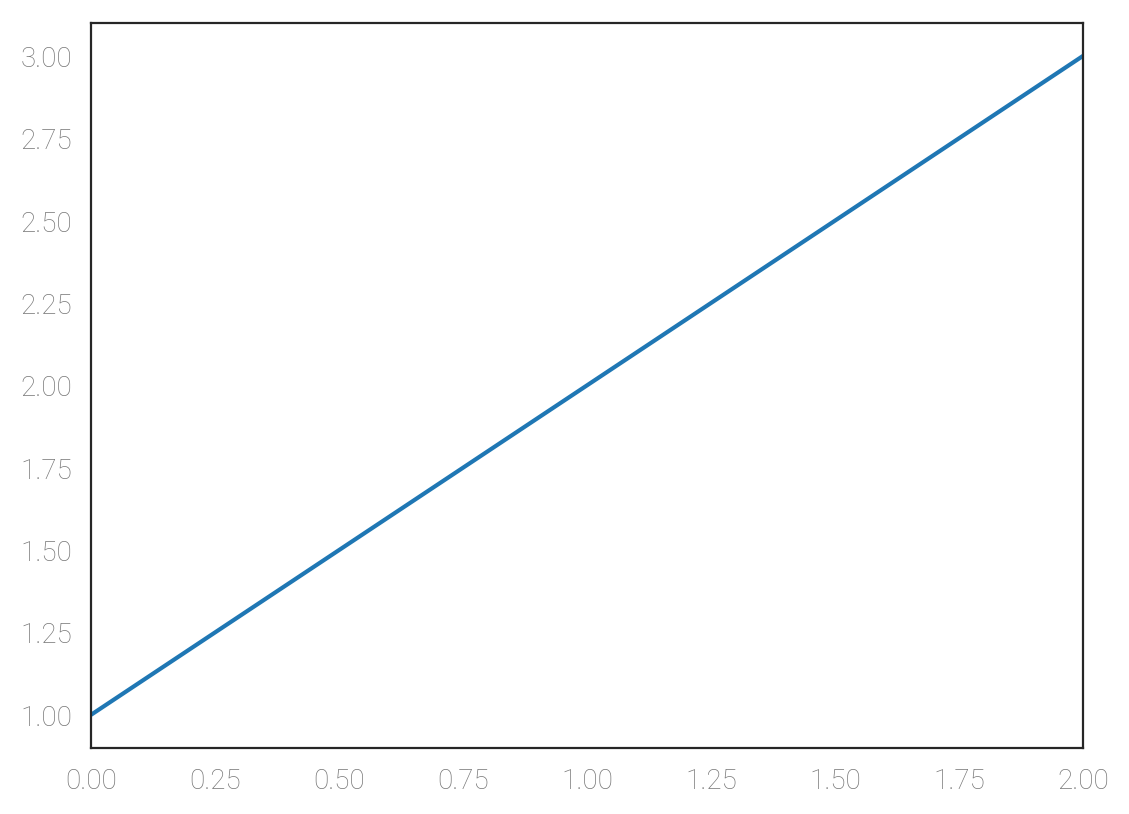

In [5]:
pd.Series([1, 2, 3]).plot()

In [129]:
acs = cenpy.products.ACS(2018)

In [130]:
print(acs)

Connection to American Community Survey: 1-Year Estimates: Detailed Tables 5-Year(ID: https://api.census.gov/data/id/ACSDT5Y2018)
With MapServer: Census Current (2018) WMS


In [122]:
acs._layer_lookup.keys()

dict_keys(['county', 'tract'])

In [123]:
acs.from_county('Ventura County, CA')

,GEOID,geometry,NAME,state,county,tract
0,06111001002,"POLYGON ((-13280830.140 4086366.760, -13280825...","Census Tract 10.02, Ventura County, California",06,111,001002
1,06111001602,"POLYGON ((-13274142.620 4064340.180, -13274111...","Census Tract 16.02, Ventura County, California",06,111,001602
2,06111004305,"POLYGON ((-13271671.550 4052440.650, -13271657...","Census Tract 43.05, Ventura County, California",06,111,004305
3,06111001507,"POLYGON ((-13270549.230 4063912.260, -13270491...","Census Tract 15.07, Ventura County, California",06,111,001507
4,06111001503,"POLYGON ((-13270796.020 4065294.000, -13270713...","Census Tract 15.03, Ventura County, California",06,111,001503
...,...,...,...,...,...,...
169,06111007507,"POLYGON ((-13228633.430 4060284.940, -13228625...","Census Tract 75.07, Ventura County, California",06,111,007507
170,06111007509,"POLYGON ((-13229506.400 4057910.810, -13229503...","Census Tract 75.09, Ventura County, California",06,111,007509
171,06111007506,"POLYGON ((-13226209.450 4059160.690, -13226207...","Census Tract 75.06, Ventura County, California",06,111,007506
172,06111008002,"POLYGON ((-13218950.970 4064655.910, -13218948...","Census Tract 80.02, Ventura County, California",06,111,008002


In [124]:
acs.from_state('CA')

,GEOID,geometry,NAME,state,county,tract
0,06023000400,"POLYGON ((-13825664.800 4977898.180, -13825655...","Census Tract 4, Humboldt County, California",06,023,000400
1,06023000500,"POLYGON ((-13821938.270 4983697.650, -13821902...","Census Tract 5, Humboldt County, California",06,023,000500
2,06015990000,"POLYGON ((-13852676.140 5136854.000, -13852343...","Census Tract 9900, Del Norte County, California",06,015,990000
3,06023001000,"POLYGON ((-13813972.580 4992111.730, -13813965...","Census Tract 10, Humboldt County, California",06,023,001000
4,06015000105,"POLYGON ((-13845495.580 5137290.910, -13844512...","Census Tract 1.05, Del Norte County, California",06,015,000105
...,...,...,...,...,...,...
8052,06065045222,"POLYGON ((-12935757.640 3991847.950, -12935701...","Census Tract 452.22, Riverside County, California",06,065,045222
8053,06065045605,"POLYGON ((-12944789.210 3974968.310, -12942889...","Census Tract 456.05, Riverside County, California",06,065,045605
8054,06071010413,"POLYGON ((-12970778.200 4038432.310, -12970736...","Census Tract 104.13, San Bernardino County, Ca...",06,071,010413
8055,06025010800,"POLYGON ((-12852707.400 3883225.220, -12852695...","Census Tract 108, Imperial County, California",06,025,010800


In [125]:
acs.from_state('CA', level='county')

AttributeError: 'GeoDataFrame' object has no attribute 'COUNTY'

In [119]:
acs.from_county('Ventura County, CA', HISPANIC, level='county')

AttributeError: 'GeoDataFrame' object has no attribute 'COUNTY'

In [51]:
acs

Connection to American Community Survey: 1-Year Estimates: Detailed Tables 5-Year(ID: https://api.census.gov/data/id/ACSDT5Y2018)
With MapServer: Census Current (2018) WMS

In [31]:
HISPANIC = ['B03002_001', # full population 
            'B03002_012' # hispanic 
           ]

In [87]:
PLACE = 'Ventura County, CA'

In [88]:
sf = acs.from_county(PLACE, variables=HISPANIC)

In [89]:
sf_basemap, sf_extent = contextily.bounds2img(
    *sf.total_bounds, zoom=10, url=contextily.tile_providers.ST_TONER_LITE)

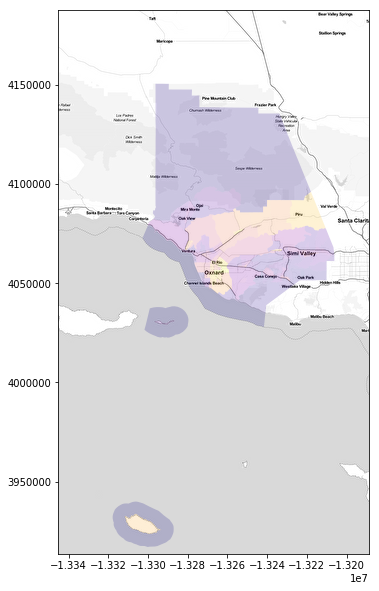

In [90]:
f,ax = plt.subplots(1,1, figsize=(10,10))
ax.imshow(sf_basemap, extent=sf_extent, interpolation='sinc')
sf['pct_hispanic'] = sf.eval('B03002_012E / B03002_001E')
sf.plot('pct_hispanic', cmap='plasma', ax=ax, alpha=.2)

In [92]:
sf_2013 = cenpy.products.ACS(2013).from_county(PLACE,
                                               variables=HISPANIC)
sf_2013['pct_hispanic'] = sf_2013.eval('B03002_012E / B03002_001E')

Text(0.5,1,'Relative Change')

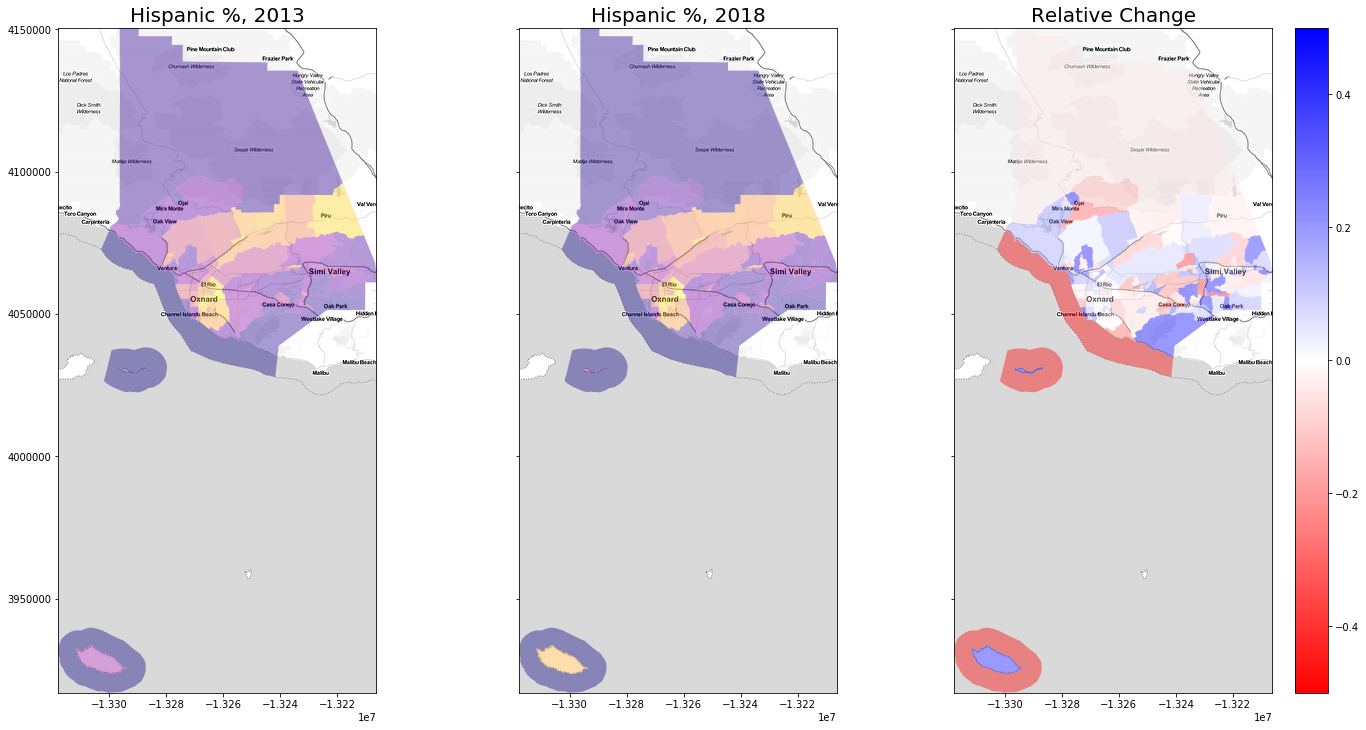

In [93]:
f,ax = plt.subplots(1, 3, figsize=(20,10), sharex=True, sharey=True)
[ax_.imshow(sf_basemap, extent=sf_extent, interpolation='sinc') for ax_ in ax]
sf.plot('pct_hispanic', cmap='plasma', ax = ax[1], alpha=.4)
sf_2013.plot('pct_hispanic', cmap='plasma', ax = ax[0], alpha=.4)
sf.merge(sf_2013.drop('geometry',axis=1), on='GEOID', suffixes=('_2018', '_2013'))\
       .eval('pct_change = (pct_hispanic_2018 - pct_hispanic_2013)/(pct_hispanic_2013)')\
       .plot('pct_change', cmap='bwr_r', ax=ax[2], alpha=.4, vmin=-.5, vmax=.5, legend=True)
f.tight_layout()
ax[0].axis(sf.total_bounds[[0,2,1,3]])
ax[0].set_title('Hispanic %, 2013', fontsize=20)
ax[1].set_title('Hispanic %, 2018', fontsize=20)
ax[2].set_title('Relative Change', fontsize=20)

In [94]:
seg_2018 = segregation.aspatial.Dissim(sf, 
                                              group_pop_var='B03002_012E', 
                                              total_pop_var='B03002_001E')

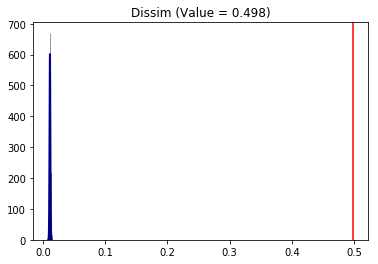

In [95]:
segregation.inference.SingleValueTest(seg_2018).plot()

In [ ]:
cenpy.products.ACS(2018).from_state('Alameda County, CA')

In [101]:
cenpy.products.ACS(2018).from_county('Alameda County, CA')

,GEOID,geometry,NAME,state,county,tract
0,06037800408,"POLYGON ((-13230311.460 4034937.650, -13229917...","Census Tract 8004.08, Los Angeles County, Cali...",06,037,800408
1,06037800327,"POLYGON ((-13220431.410 4048443.460, -13220429...","Census Tract 8003.27, Los Angeles County, Cali...",06,037,800327
2,06037137302,"POLYGON ((-13210079.370 4053554.540, -13210018...","Census Tract 1373.02, Los Angeles County, Cali...",06,037,137302
3,06037134424,"POLYGON ((-13210039.070 4056625.130, -13210038...","Census Tract 1344.24, Los Angeles County, Cali...",06,037,134424
4,06037920116,"POLYGON ((-13208961.500 4092718.770, -13208930...","Census Tract 9201.16, Los Angeles County, Cali...",06,037,920116
...,...,...,...,...,...,...
2341,06037401602,"POLYGON ((-13110499.520 4042649.280, -13110483...","Census Tract 4016.02, Los Angeles County, Cali...",06,037,401602
2342,06037402501,"POLYGON ((-13110490.950 4036114.330, -13110472...","Census Tract 4025.01, Los Angeles County, Cali...",06,037,402501
2343,06037400207,"POLYGON ((-13112795.590 4045618.750, -13112785...","Census Tract 4002.07, Los Angeles County, Cali...",06,037,400207
2344,06037402803,"POLYGON ((-13107855.570 4035594.100, -13107830...","Census Tract 4028.03, Los Angeles County, Cali...",06,037,402803


In [96]:
seg_2013 = segregation.aspatial.Dissim(sf_2013, 
                                              group_pop_var='B03002_012E', 
                                              total_pop_var='B03002_001E')

In [97]:
seg_2013.statistic, seg_2018.statistic

(0.5002301313651897, 0.4977772784657561)

In [98]:
time_comparison = segregation.inference.TwoValueTest(seg_2018, seg_2013)

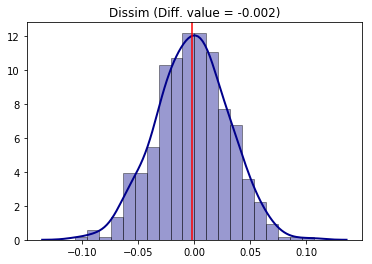

In [99]:
time_comparison.plot()

In [15]:
from cenpy import products

In [2]:
vc = cenpy.products.ACS(2017).from_place('Ventura County, CA', level='tract',
                                        variables=['B00002*', 'B01002H_001E'])

Matched: Ventura County, CA to San Buenaventura (Ventura) city within layer Incorporated Places


In [24]:
cenpy.products.ACS(2018).from_place('Los Angeles County, CA')

Matched: Los Angeles County, CA to Los Angeles city within layer Incorporated Places


,GEOID,geometry,state,county,tract
0,06037239702,"POLYGON ((-13166949.410 4023991.280, -13166932...",06,037,239702
1,06037294510,"POLYGON ((-13166314.000 4000710.020, -13166192...",06,037,294510
2,06037135102,"POLYGON ((-13205095.480 4055355.070, -13205055...",06,037,135102
3,06037135113,"POLYGON ((-13204118.430 4053377.450, -13203946...",06,037,135113
4,06037134520,"POLYGON ((-13203142.830 4055825.340, -13202980...",06,037,134520
...,...,...,...,...,...
744,06037206032,"POLYGON ((-13161167.590 4035828.410, -13161159...",06,037,206032
745,06037185202,"POLYGON ((-13160920.120 4041961.380, -13160918...",06,037,185202
746,06037205110,"POLYGON ((-13160149.570 4032332.010, -13160128...",06,037,205110
747,06037203710,"POLYGON ((-13158557.480 4035607.260, -13158519...",06,037,203710


In [27]:
cenpy.products.ACS(2018).from_place('San Mateo County')

/home/mghenis/miniconda3/lib/python3.7/site-packages/cenpy/products.py:657: UserWarning: Uncertain place identifier "San Mateo County". The place identifier should look something like "placename, state" or, for larger areas, like Combined Statistical Areas or Metropolitan Statistical Areas,"placename1-placename2, state1-state2-state3"
  replace_missing=replace_missing)


Matched: San Mateo County to San Mateo CDP within layer Census Designated Places


IndexError: too many indices for array

Empty GeoDataFrame
Columns: [geometry, state, county, tract, GEOID]
Index: []

In [28]:
cenpy.products.ACS(2018).from_place('Los Angeles CDP')

/home/mghenis/miniconda3/lib/python3.7/site-packages/cenpy/products.py:657: UserWarning: Uncertain place identifier "Los Angeles CDP". The place identifier should look something like "placename, state" or, for larger areas, like Combined Statistical Areas or Metropolitan Statistical Areas,"placename1-placename2, state1-state2-state3"
  replace_missing=replace_missing)


Matched: Los Angeles CDP to Los Angeles CDP within layer Census Designated Places


IndexError: too many indices for array

Empty GeoDataFrame
Columns: [geometry, state, county, tract, GEOID]
Index: []

In [26]:
cenpy.products.ACS(2018).from_place('Los Angeles County')

/home/mghenis/miniconda3/lib/python3.7/site-packages/cenpy/products.py:657: UserWarning: Uncertain place identifier "Los Angeles County". The place identifier should look something like "placename, state" or, for larger areas, like Combined Statistical Areas or Metropolitan Statistical Areas,"placename1-placename2, state1-state2-state3"
  replace_missing=replace_missing)


Matched: Los Angeles County to Los Angeles CDP within layer Census Designated Places


IndexError: too many indices for array

Empty GeoDataFrame
Columns: [geometry, state, county, tract, GEOID]
Index: []

In [25]:
cenpy.products.ACS(2018).from_place('Alameda County')

/home/mghenis/miniconda3/lib/python3.7/site-packages/cenpy/products.py:657: UserWarning: Uncertain place identifier "Alameda County". The place identifier should look something like "placename, state" or, for larger areas, like Combined Statistical Areas or Metropolitan Statistical Areas,"placename1-placename2, state1-state2-state3"
  replace_missing=replace_missing)


Matched: Alameda County to Alameda city within layer Incorporated Places


,GEOID,geometry,state,county,tract
0,06001428600,"POLYGON ((-13612315.870 4545982.650, -13612211...",06,001,428600
1,06001427700,"POLYGON ((-13613444.430 4546455.930, -13613439...",06,001,427700
2,06001427800,"POLYGON ((-13611801.580 4547206.380, -13611801...",06,001,427800
3,06001427900,"POLYGON ((-13610314.240 4546878.540, -13610310...",06,001,427900
4,06001428000,"POLYGON ((-13609248.130 4546534.370, -13609238...",06,001,428000
5,06001428500,"POLYGON ((-13610419.100 4545432.790, -13610411...",06,001,428500
6,06001428302,"POLYGON ((-13610111.860 4542843.290, -13610095...",06,001,428302
7,06001428100,"POLYGON ((-13608159.760 4545937.310, -13608153...",06,001,428100
8,06001428200,"POLYGON ((-13609181.120 4544044.270, -13609123...",06,001,428200
9,06001427600,"POLYGON ((-13613415.930 4548391.810, -13613408...",06,001,427600


In [19]:
vc = cenpy.products.ACS(2018).from_place('Alameda County, CA', level='tract',
                                        variables=['B00002*', 'B01002H_001E'])

Matched: Alameda County, CA to Alameda city within layer Incorporated Places


In [20]:
vc = cenpy.products.ACS(2018).from_place('Los Angeles County, CA', level='tract',
                                        variables=['B00002*', 'B01002H_001E'])

Matched: Los Angeles County, CA to Los Angeles city within layer Incorporated Places


In [13]:
vc = cenpy.products.ACS(2017).from_place('Ventura County', level='tract',
                                        variables=['^P004'])

/home/mghenis/miniconda3/lib/python3.7/site-packages/cenpy/products.py:657: UserWarning: Uncertain place identifier "Ventura County". The place identifier should look something like "placename, state" or, for larger areas, like Combined Statistical Areas or Metropolitan Statistical Areas,"placename1-placename2, state1-state2-state3"
  replace_missing=replace_missing)


Matched: Ventura County to Ventura CDP within layer Census Designated Places


In [14]:
vc

IndexError: too many indices for array

Empty GeoDataFrame
Columns: [geometry, state, county, tract, GEOID]
Index: []

In [3]:
chicago = cenpy.products.ACS(2017).from_place('Chicago, IL', level='tract',
                                        variables=['B00002*', 'B01002H_001E'])

Matched: Chicago, IL to Chicago city within layer Incorporated Places


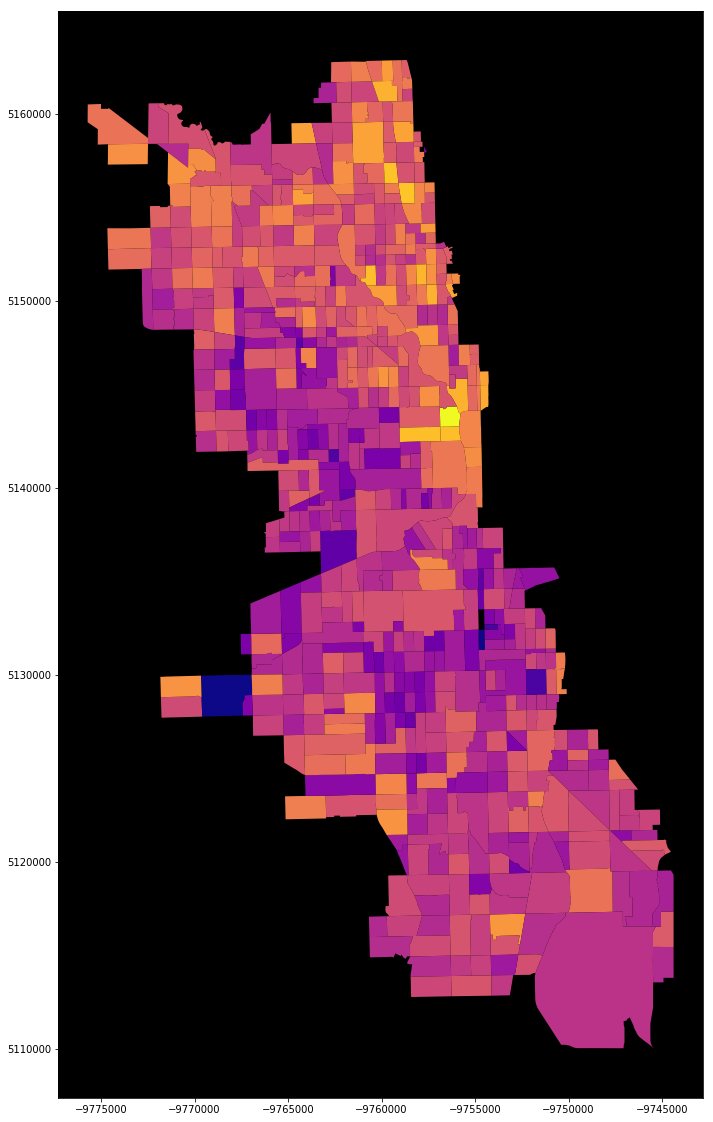

In [4]:
f, ax = plt.subplots(1,1,figsize=(20,20))
chicago.dropna(subset=['B00002_001E'], axis=0).plot('B00002_001E', ax=ax, cmap='plasma')
ax.set_facecolor('k')

/home/mghenis/miniconda3/lib/python3.7/site-packages/geopandas/plotting.py:487: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


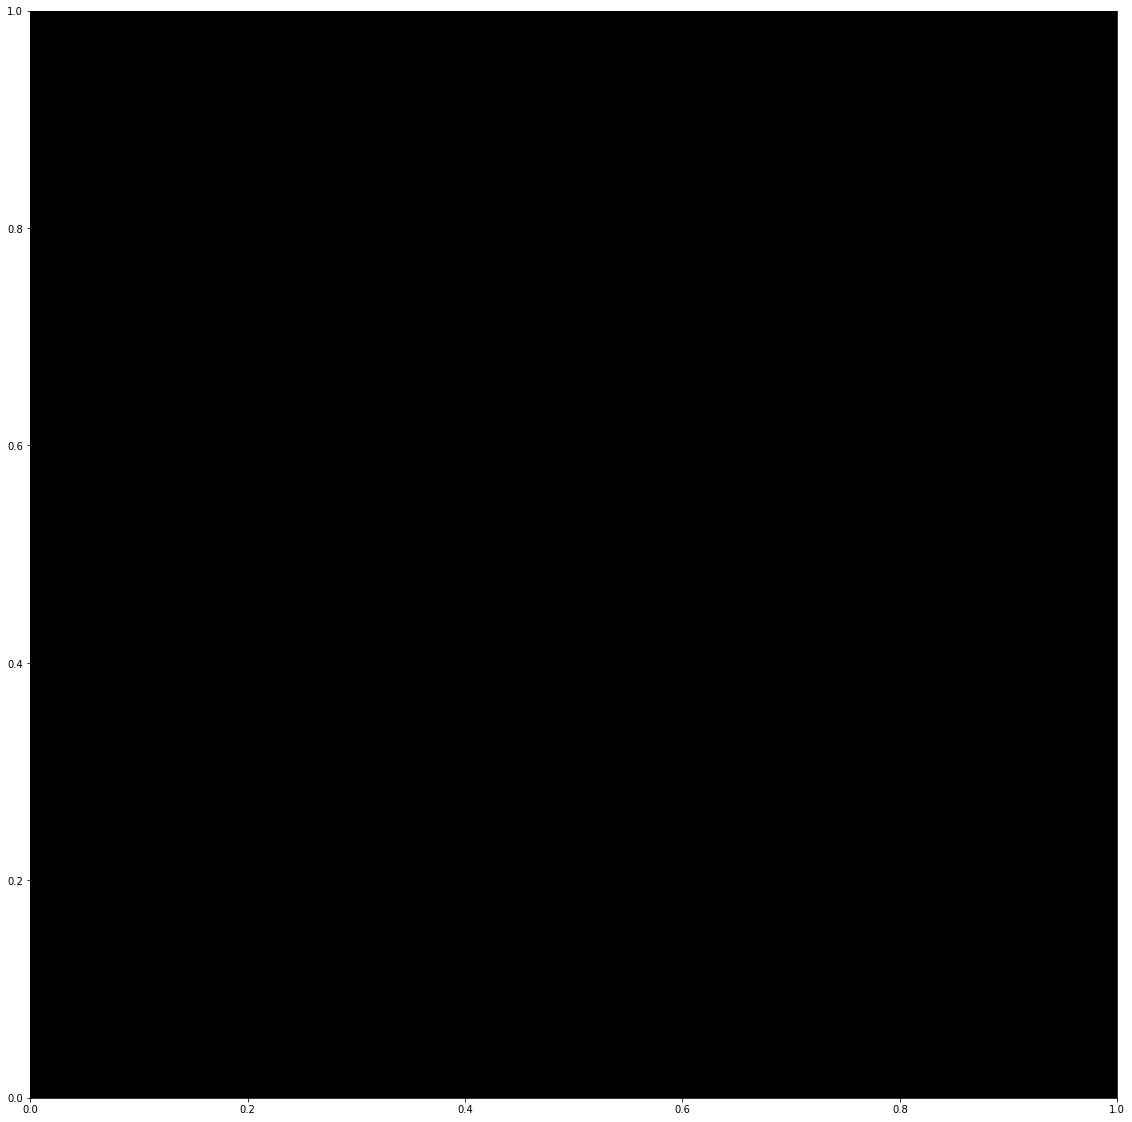

In [8]:
f, ax = plt.subplots(1,1,figsize=(20,20))
vc.dropna(subset=['B00002_001E'], axis=0).plot('B00002_001E', ax=ax, cmap='plasma')
ax.set_facecolor('k')

In [6]:
chicago

,GEOID,geometry,B00001_001E,B00002_001E,B01002H_001E,state,county,tract
0,17031151200,"POLYGON ((-9771235.620 5152859.660, -9771181.2...",288.0,115.0,46.9,17,031,151200
1,17031190701,"POLYGON ((-9770093.810 5150690.620, -9770066.4...",300.0,104.0,44.8,17,031,190701
2,17031251100,"POLYGON ((-9768928.080 5146348.050, -9768900.8...",289.0,128.0,32.9,17,031,251100
3,17031560400,"POLYGON ((-9767530.790 5132204.820, -9767523.6...",194.0,55.0,60.0,17,031,560400
4,17031200100,"POLYGON ((-9767411.900 5151830.000, -9767408.6...",326.0,111.0,54.9,17,031,200100
...,...,...,...,...,...,...,...,...
659,17031431200,"POLYGON ((-9748931.530 5124928.390, -9748904.0...",184.0,95.0,67.5,17,031,431200
660,17031450300,"POLYGON ((-9750018.680 5123400.990, -9750017.2...",253.0,119.0,NaN,17,031,450300
661,17031838800,"POLYGON ((-9751804.910 5113782.550, -9751802.9...",258.0,99.0,62.6,17,031,838800
662,17031460200,"POLYGON ((-9746328.770 5122804.180, -9746314.4...",231.0,113.0,56.0,17,031,460200


In [18]:
for year in range(2018, 2020):
    print(year)
    acs = products.ACS(year=year)
    acs.from_place('Tucson, AZ')

2018
Matched: Tucson, AZ to Tucson city within layer Incorporated Places
2019


KeyError: 'The requested Census Product shortcode (ACSDT5Y2019) was not found in the list of API shortcodes. Please check cenpy.explorer.available() to determine whether the API shortcode you have requested is correct.'